In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/gender_submission.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train_df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
B19            1
B86            1
B73            1
B69            1
C104           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
train_df[['Embarked','Survived','PassengerId']].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [17]:
train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [18]:
embarked_df = train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count().unstack()

In [19]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<AxesSubplot:xlabel='Embarked'>

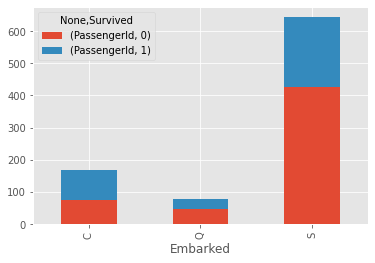

In [20]:
embarked_df.plot.bar(stacked=True)

In [21]:
embarked_df['survived_rate'] = embarked_df.iloc[:,0]/(embarked_df.iloc[:,0]+embarked_df.iloc[:,1])

In [22]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<AxesSubplot:xlabel='Sex'>

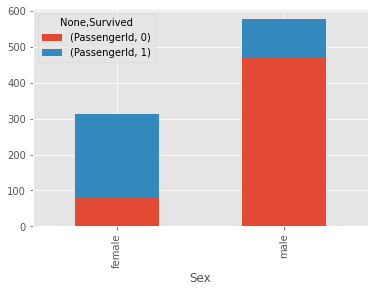

In [23]:
sex_df = train_df[['Sex','Survived','PassengerId']].dropna().groupby(['Sex','Survived']).count().unstack()
sex_df.plot.bar(stacked = True)

<AxesSubplot:xlabel='Pclass'>

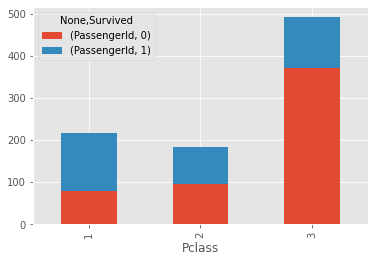

In [24]:
ticket_df = train_df[['Pclass','Survived','PassengerId']].dropna().groupby(['Pclass','Survived']).count().unstack()
ticket_df.plot.bar(stacked = True)

In [25]:
train_df_corr = pd.get_dummies(train_df,columns=['Sex','Embarked'])

In [26]:
train_df_corr

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0


In [27]:
train_corr = train_df_corr.corr()

In [28]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359


<AxesSubplot:>

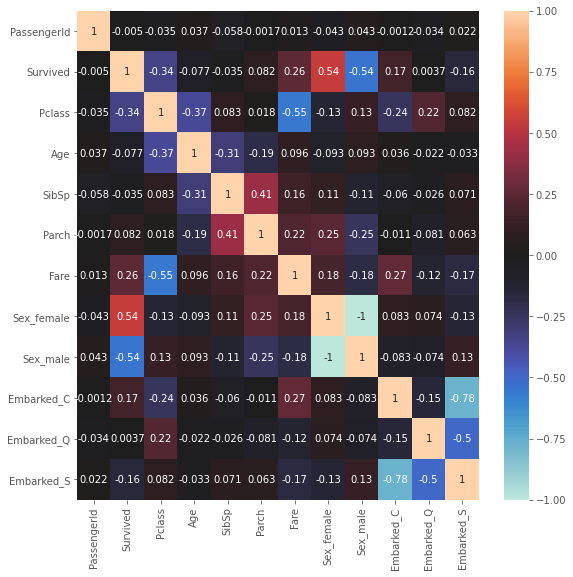

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr,vmax=1,vmin=-1,center=0,annot=True)

In [30]:
all_df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)

In [31]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [33]:
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()

In [34]:
Fare_mean.columns=['Pclass','Fare_mean']

In [35]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [36]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass",how="left")
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean",axis=1)

In [37]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
all_df['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [39]:
name_df = all_df['Name'].str.split('[,.]',2,expand=True)

In [40]:
name_df.columns = ['family_name','honorific','name']

In [41]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [42]:
name_df["family_name"] =name_df["family_name"].str.strip()
name_df["honorific"] =name_df["honorific"].str.strip()
name_df["name"] =name_df["name"].str.strip()

In [43]:
name_df['honorific'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
Capt              1
Sir               1
Mme               1
Jonkheer          1
Dona              1
Don               1
the Countess      1
Name: honorific, dtype: int64

In [44]:
 all_df = pd.concat([all_df,name_df],axis=1)

<AxesSubplot:xlabel='honorific', ylabel='Age'>

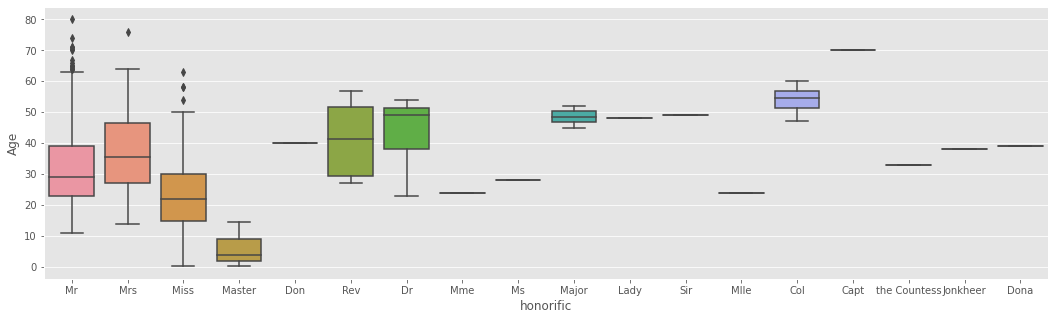

In [45]:
plt.figure(figsize=(18,5))
sns.boxplot(x='honorific',y='Age',data=all_df)

In [46]:
train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)

In [47]:
test_df = pd.concat([test_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)

In [48]:
honorific_df = train_df[['honorific','Survived','PassengerId']].dropna().groupby(['honorific','Survived']).count().unstack()

<AxesSubplot:xlabel='honorific'>

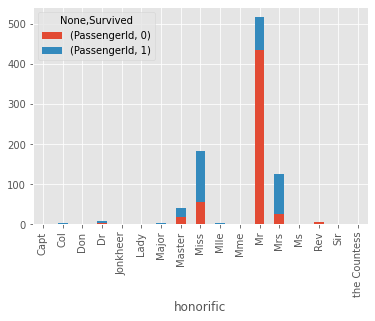

In [49]:
honorific_df.plot.bar(stacked=True)

In [50]:
honorific_age_mean = all_df[['honorific','Age']].groupby('honorific').mean().reset_index()

In [51]:
honorific_age_mean.columns=['honorific','honorific_age']

In [52]:
honorific_age_mean

,honorific,honorific_age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [53]:
all_df=pd.merge(all_df,honorific_age_mean,on='honorific',how='left')

In [54]:
all_df.loc[(all_df['Age'].isnull()),'Age']=all_df['honorific_age']
all_df = all_df.drop(['honorific_age'],axis=1)

In [55]:
all_df['family_num']=all_df['Parch']+all_df['SibSp']

In [56]:
all_df['family_num'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [57]:
all_df.loc[all_df['family_num']==0,'alone'] = 1

In [58]:
all_df['alone'].fillna(0,inplace=True)

In [59]:
all_df = all_df.drop(['PassengerId','Name','family_name','name','Ticket','Cabin'],axis=1)

In [60]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [61]:
categories = all_df.columns[all_df.dtypes=='object']
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [62]:
all_df.loc[~((all_df['honorific']=='Mr')|(all_df['honorific']=='Miss')|(all_df['honorific']=='Mrs')|(all_df['honorific']=='Master')),'honorific']='other'

In [63]:
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
all_df['Embarked'].fillna('missing',inplace=True)

In [66]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [67]:
le = LabelEncoder()
le = le.fit(all_df['Sex'])
all_df['Sex']=le.transform(all_df['Sex'])

In [68]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtype == 'object':
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [69]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [70]:
train_X = all_df[~all_df['Survived'].isnull()].drop('Survived',axis=1).reset_index(drop=True)
train_Y = train_df['Survived']

In [71]:
test_X = all_df[all_df['Survived'].isnull()].drop('Survived',axis=1).reset_index(drop=True)

In [72]:
import lightgbm as lgb

In [73]:
from sklearn.model_selection import train_test_split,KFold

In [74]:
X_train,X_valid,y_train,y_valid=train_test_split(train_X,train_Y,test_size=0.2)

In [75]:
categories=['Embarked','Pclass','Sex','honorific','alone']

In [78]:
lgb_train = lgb.Dataset(X_train,y_train,categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid,y_valid,categorical_feature=categories,reference=lgb_train)

In [77]:
lgbm_params={
    'objective':'binary',
    'random_seed':1234
}

In [79]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.460022
[20]	valid_0's binary_logloss: 0.441134
[30]	valid_0's binary_logloss: 0.4502
[40]	valid_0's binary_logloss: 0.471068
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.436862


/Users/nozomusato/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [81]:
model_lgb.feature_importance()

array([ 31,  19, 220,   9,   4, 246,  16,   3,  29,   6], dtype=int32)

<AxesSubplot:>

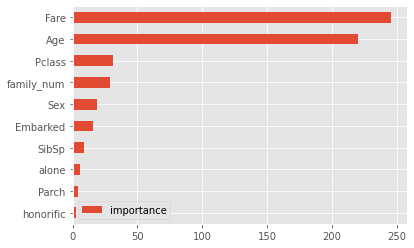

In [83]:
importance=pd.DataFrame(model_lgb.feature_importance(),index=X_train.columns,columns=['importance']).sort_values(by='importance',ascending=True)
importance.plot.barh()

In [84]:
y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)

In [85]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_valid,np.round(y_pred))

0.8324022346368715

In [89]:
np.round(y_pred)

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1.])

In [90]:
lgbm_params = {
    "objective":"binary",
    "max_bin":331,
    "num_leaves": 20,
    "min_data_in_leaf": 57,
    "andom_seed":1234
}

In [91]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [92]:
model_lgb = lgb.train(lgbm_params, lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.472605
[20]	valid_0's binary_logloss: 0.433054
[30]	valid_0's binary_logloss: 0.430654
[40]	valid_0's binary_logloss: 0.432176
[50]	valid_0's binary_logloss: 0.438386
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.428659


/Users/nozomusato/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [93]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [94]:
accuracy_score(y_valid, np.round(y_pred))

0.8212290502793296

In [96]:
folds = 3
kf = KFold(n_splits=folds)

In [99]:
models=[]

for train_index,val_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    X_valid=train_X.iloc[val_index]
    y_train=train_Y.iloc[train_index]
    y_valid=train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    
    models.append(model_lgb)   

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.503031
[20]	valid_0's binary_logloss: 0.465863
[30]	valid_0's binary_logloss: 0.454056
[40]	valid_0's binary_logloss: 0.451228
[50]	valid_0's binary_logloss: 0.44724
[60]	valid_0's binary_logloss: 0.447342
[70]	valid_0's binary_logloss: 0.450126
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.445648
0.8249158249158249
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.482264
[20]	valid_0's binary_logloss: 0.440853
[30]	valid_0's binary_logloss: 0.435016
[40]	valid_0's binary_logloss: 0.433286
[50]	valid_0's binary_logloss: 0.432128
[60]	valid_0's binary_logloss: 0.430387
[70]	valid_0's binary_logloss: 0.431241
[80]	valid_0's binary_logloss: 0.438053
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.429561
0.8181818181818182
Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss:

/Users/nozomusato/opt/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [100]:
preds=[]

for model in models:
    pred=model.predict(test_X)
    preds.append(pred)

In [101]:
preds_array=np.array(preds)
preds_mean=np.mean(preds_array,axis=0)

In [104]:
preds_int=(preds_mean > 0.5).astype(int)

In [105]:
submission['Survived']=preds_int

In [106]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
submission.to_csv('titanic_submit01.csv',index=False)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
models=[]

for train_index,val_index in kf.split(train_X):
    X_train=train_X.iloc[train_index]
    X_valid=train_X.iloc[val_index]
    y_train=train_Y.iloc[train_index]
    y_valid=train_Y.iloc[val_index]

    forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                         max_depth=25, max_features='auto', max_leaf_nodes=None,
                                         min_samples_leaf=1, min_samples_split=15,
                                         min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
                                         oob_score=False, random_state=0, verbose=0, warm_start=False)
    forest.fit(X_train,y_train)
    print(forest.score(X_valid,y_valid))

0.8013468013468014
0.8417508417508418
0.8215488215488216


In [119]:
y_pred_forest = forest.predict(test_X)

In [120]:
y_pred_forest

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
len(y_pred_forest)

418

In [122]:
submission['Survived']=y_pred_forest

In [124]:
submission.to_csv('titanic_submit02.csv',index=False)